<a href="https://colab.research.google.com/github/kgeetha248/CustomerConversionPrediction/blob/main/CustomerConversionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("CustomerConversion.csv")
data.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no

Supervised Learning,Binary Classification Problem

**Data Cleaning**

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
data.shape

(45211, 11)

In [ ]:
data = data.drop_duplicates()
data.shape

(45205, 11)

In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
data['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [ ]:
data['y_new'] = data['y'].map({'yes' : 1 , 'no' : 0})
data.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  y_new  
0          1      unknown  no      0  
1          1      unknown  no      0  
2          1      unknown  no      0  
3          1      unknown  no      0  
4          1      unknown  no      0

**Age**

In [ ]:
data.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
data.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
import plotly.express as px
fig = px.histogram(data, x= 'age', y = 'y_new',title = 'Distribution of age')
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
data.loc[(data.age == 49) & (data.y == 'yes')] #101 rows

In [ ]:
Q3 = data.age.quantile(0.75)
Q1 = data.age.quantile(0.25)
IQR = Q3 - Q1
Upper_threshold = Q3 + (1.5 * IQR)
Lower_threshold = Q1 - (1.5 * IQR)
Lower_threshold, Upper_threshold

(10.5, 70.5)

In [ ]:
data.age = data.age.clip(10, 71)

In [ ]:
data.age.describe()

count    45205.000000
mean        40.874439
std         10.410718
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         71.000000
Name: age, dtype: float64

In [ ]:
#Binning - Convert numerical featured to categorical using bins
# bins = range(18,71,5) #[18,23,28,33,38,43,48,53,58,63,66,73]
# labels = [0,1,2,3,4,5,6,7,8,9]
# data['age_bin'] = pd.cut(data['age'],bins = bins , labels = labels, include_lowest = True)
# data.head(1)

age         job  marital education_qual call_type  day  mon  dur  \
0   58  management  married       tertiary   unknown    5  may  261   

   num_calls prev_outcome   y  y_new age_bin  
0          1      unknown  no      0       7

In [ ]:
data.age_bin.isnull().sum()

0

**Call Type**

In [ ]:
data.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
data.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
data.groupby('call_type')['y_new'].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: y_new, dtype: float64

In [ ]:
import plotly.express as px
call_type = data.groupby('call_type')['y_new'].mean().sort_values(ascending = False)
fig = px.bar(call_type, title = 'Call_type vs target')
fig.show()

In [ ]:
fig = px.sunburst(data, path = ['call_type','y'])
fig.show()

**Job**

In [ ]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
data.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.pie(data,names = 'job')
fig.update_traces(textposition = 'outside')
fig.show()

In [ ]:
data.loc[data.job == 'unknown','job'] = 'blue-collar'
data.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
data.loc[data.job == 'student']  # 938 rows
#data.loc[(data.job == 'student') & (data.y == 'yes')] # 269 rows -> 269/938 = 28%
#data.loc[(data.job == 'student') & (data.y == 'no')] # 669 rows -> 669/938 = 72%

In [ ]:
#data.loc[data.job == 'blue-collar']  # 10018 rows
#data.loc[(data.job == 'blue-collar') & (data.y == 'yes')] # 742 rows -> 0.07%
data.loc[(data.job == 'blue-collar') & (data.y == 'no')] # 9276 rows -> 92%

In [ ]:
fig = px.bar(data.groupby('job')['y_new'].mean().sort_values(ascending = False))
fig.show()

**Marital**

In [ ]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
data.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
fig = px.pie(data, names = 'marital', hole = 0.5)
fig.show()

In [ ]:
#(data.loc[(data.marital == 'married') & (data.y == 'yes')]) # 2755 / 27210 =0.10
data.loc[(data.marital == 'single') & (data.y == 'yes')] # 1912 / 12778 =0.14

In [ ]:
fig = px.bar(data.groupby('marital')['y_new'].mean().sort_values(ascending = False))
fig.show()

**Education Qualification**

In [ ]:
data.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

Unknown in this column may refer either missing values 

In [ ]:
data['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
# edu_qual_count = data['education_qual'].value_counts()
# edu_qual_values = [i for i in edu_qual_count]
# qual_list = ['secondary', 'tertiary', 'primary' , 'unknown']
# edu_qual = pd.DataFrame(qual_list,columns =['qualification'])
# edu_qual['count'] = edu_qual_values
# edu_qual

In [ ]:
fig =px.sunburst(data, path = ['education_qual','y'])
fig.show()

In [ ]:
data.loc[data.education_qual == 'unknown','education_qual']='secondary'
data.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:
fig = px.bar(data.groupby('education_qual')['y_new'].mean().sort_values(ascending = False))
fig.show()

**Month**

In [ ]:
data['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
# import datetime
# data["mon_edit"] = pd.to_datetime(data["mon"], format='%b').dt.month
# data_sorted = data.sort_values(by='mon_edit')

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(go.Pie(labels = data['mon'],pull = [0.5,0,0,0,0,0,0,0,0,0,0,0]))
fig.update_traces(textposition = 'outside')
fig.show()

In [ ]:
data.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
import plotly.express as px
#fig = px.histogram(data,x = 'mon')
fig = px.bar(data.mon.value_counts().sort_values(ascending = False))
fig.show()

In [ ]:
fig = px.bar(data.groupby('mon')['y_new'].mean().sort_values(ascending = False))
fig.show()

In [ ]:
fig = px.sunburst(data, path = ['mon','y'])
fig.show()

**Day**

In [ ]:
data['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
#fig = px.scatter_3d(data, x = 'num_calls' , y = 'age' , z= 'mon', color = 'y')
fig = px.scatter_3d(data, x = 'num_calls' , y = 'age' , z= 'y',color = 'y')
fig.show()

**Duration**

In [ ]:
data.dur.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [ ]:
data.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

4918 seconds = 1 hr 12 mins. 

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize = (4,4))
# sns.scatterplot(x = 'dur' , y = 'y' , hue = 'y' , data = data)
# plt.title('Duration vs Target')
# plt.xlabel('Age')
# plt.ylabel('Y')
# ax = plt.gca()

In [ ]:
fig = px.scatter(data, x = 'dur' , y = 'y' , color = 'y')
fig.show()

In [ ]:
Q3 = data.dur.quantile(0.75)
Q1 = data.dur.quantile(0.25)
IQR = Q3 - Q1
Upper_threshold = Q3 + ( 1.5 * IQR)
Lower_threshold = Q1 - ( 1.5 * IQR)
Lower_threshold , Upper_threshold 

(-221.0, 643.0)

In [ ]:
data.loc[data.dur > 1200] 

upper threshold approximates 10 mins. BUt there are 3235 rows mor than this threshold.

In [ ]:
data.dur = data.dur.clip(0,1000)
data.dur.describe()

count    45205.000000
mean       250.104568
std        218.604428
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       1000.000000
Name: dur, dtype: float64

In [ ]:
fig = px.histogram(data, x = 'dur')
fig.show()

**Number of Calls**

In [ ]:
data.num_calls.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

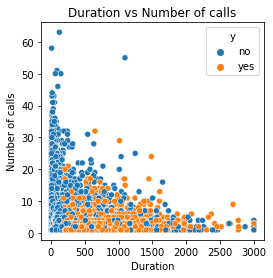

In [ ]:
# plt.figure(figsize = (4,4))
# sns.scatterplot(x = 'dur' , y = 'num_calls' , hue = 'y' , data = data)
# plt.title('Duration vs Number of calls')
# plt.xlabel('Duration')
# plt.ylabel('Number of calls')
# ax = plt.gca()

In [ ]:
fig = px.histogram(data, x = 'num_calls')
fig.show()

In [ ]:
fig = px.scatter(data,x = 'num_calls', y ='y',color = 'y')
fig.show()

In [ ]:
Q3 = data.num_calls.quantile(0.75)
Q1 = data.num_calls.quantile(0.25)
IQR = Q3 - Q1
upper_threshold = Q3 + (1.5 * IQR)
lower_threshold = Q1 - (1.5 * IQR)
lower_threshold, upper_threshold

(-2.0, 6.0)

In [ ]:
fig =px.sunburst(data, path =['mon','y'])
fig.show()

In [ ]:
data.loc[(data.num_calls > 14)]  # >6 ->3064 rows, >14-> 614, >12 -> 840, >10 ->1196

In [ ]:
fig = px.box(data, x = 'num_calls' , y = 'y')
fig.show()

In [ ]:
data.num_calls = data.num_calls.clip(0,10)
data.num_calls.describe()

count    45205.000000
mean         2.583453
std          2.133147
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: num_calls, dtype: float64

**Previous Outcome**

In [ ]:
data.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
data.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
# data.loc[data.prev_outcome == 'unknown','prev_outcome'] = 'other'
# data.prev_outcome.value_counts()

In [ ]:
fig = px.pie(data, names = 'prev_outcome')
fig.show()

In [ ]:
fig =px.sunburst(data, path = ['education_qual','prev_outcome','y'])
fig.show()

In [ ]:
fig = px.bar(data.groupby('prev_outcome')['y_new'].mean().sort_values(ascending = False))
fig.show()

**Target - Y**

In [ ]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
fig = px.pie(data, names = 'y')
fig.show()

**Since 88 % falls under one category, this is an imbalanced data. **

**Sub plots Visualization**

In [ ]:
from plotly.subplots import make_subplots
#fig=make_subplots(rows=1,cols=2,subplot_titles=("Scatter Plot","Scatter Plot 3D"))
fig=make_subplots(rows=1,cols=2,subplot_titles=("Scatter Plot","Scatter Plot 3D"),specs=[[{"type":"xy"},{"type":"scene"}]])

fig.append_trace(go.Scatter(x=data["dur"],y=data["mon"],mode="markers"),row=1,col=1)
fig.append_trace(go.Scatter3d(x=data['num_calls'],y=data['age'],z= data['y']),row=1,col=2)
#fig.append_trace(go.Pie(values = data['prev_outcome']),row=1,col=2)
fig.update_layout(title_text="subplots")
fig.show()

**Encoding**

In [ ]:
data.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married      secondary   unknown    5  may   92   
4   33   blue-collar   single      secondary   unknown    5  may  198   

   num_calls prev_outcome   y  y_new  
0          1      unknown  no      0  
1          1      unknown  no      0  
2          1      unknown  no      0  
3          1      unknown  no      0  
4          1      unknown  no      0

<Axes: xlabel='num_calls', ylabel='dur'>

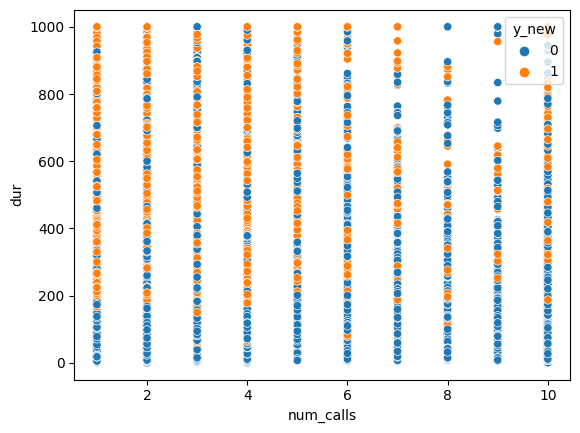

In [ ]:
import seaborn as sns
sns.scatterplot(x="num_calls", y="dur", hue='y_new', data=data)

<Axes: xlabel='prev_outcome', ylabel='education_qual'>

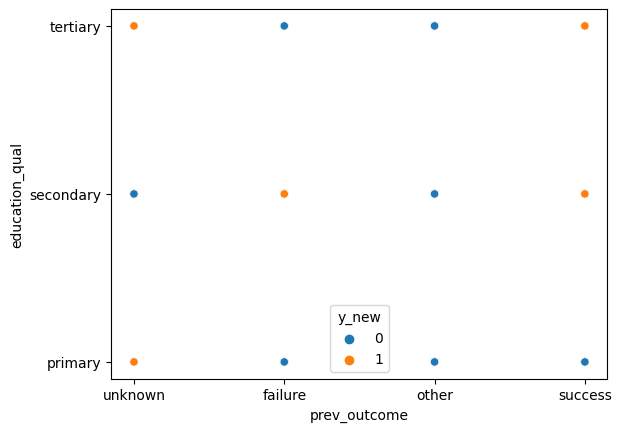

In [ ]:
sns.scatterplot(x="prev_outcome", y="education_qual", hue='y_new', data=data)

In [ ]:
data = data.drop(['y'], axis = 1)
data.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married      secondary   unknown    5  may   92   
4   33   blue-collar   single      secondary   unknown    5  may  198   

   num_calls prev_outcome  y_new  
0          1      unknown      0  
1          1      unknown      0  
2          1      unknown      0  
3          1      unknown      0  
4          1      unknown      0

Since encoding doesnt matter much in Tree algorithm, we do label encoding.

In [ ]:
cleaned_data = data.copy(deep=True)

In [ ]:
# data_OHE = pd.get_dummies(data, columns = ['job', 'marital','education_qual','call_type','mon','prev_outcome'])
# data_OHE.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)
data.head()

age  job  marital  education_qual  call_type  day  mon  dur  num_calls  \
0   40    4        1               2          2    4    8  261          0   
1   26    9        2               1          2    4    8  151          0   
2   15    2        1               1          2    4    8   76          0   
3   29    1        1               1          2    4    8   92          0   
4   15    1        2               1          2    4    8  198          0   

   prev_outcome  y_new  
0             3      0  
1             3      0  
2             3      0  
3             3      0  
4             3      0

In [ ]:
data.prev_outcome.value_counts()

3    36953
0     4901
1     1840
2     1511
Name: prev_outcome, dtype: int64

In [ ]:
data.marital.value_counts()

1    27210
2    12788
0     5207
Name: marital, dtype: int64

In [ ]:
data.education_qual.value_counts()

1    25056
2    13299
0     6850
Name: education_qual, dtype: int64

In [ ]:
data.call_type.value_counts()

0    29282
2    13017
1     2906
Name: call_type, dtype: int64

In [ ]:
data.mon.value_counts()

8     13765
5      6894
1      6245
6      5339
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: mon, dtype: int64

In [ ]:
data.prev_outcome.value_counts()

3    36953
0     4901
1     1840
2     1511
Name: prev_outcome, dtype: int64

In [ ]:
data.job.value_counts()

1     10018
4      9457
9      7596
0      5170
7      4153
5      2264
6      1579
2      1487
10     1303
3      1240
8       938
Name: job, dtype: int64

In [ ]:
# cleaned_data = pd.get_dummies(data, columns = ['job','marital','education_qual','prev_outcome'])
# cleaned_data.head(1)

**Final cleaned data**

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y_new             0
dtype: int64

In [ ]:
data.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
dtype: object

In [ ]:
data.shape

(45205, 11)

In [ ]:
data.describe()

age           job       marital  education_qual     call_type  \
count  45205.000000  45205.000000  45205.000000    45205.000000  45205.000000   
mean      22.874439      4.276142      1.167703        1.142661      0.640195   
std       10.410718      3.239530      0.608243        0.652213      0.897927   
min        0.000000      0.000000      0.000000        0.000000      0.000000   
25%       15.000000      1.000000      1.000000        1.000000      0.000000   
50%       21.000000      4.000000      1.000000        1.000000      0.000000   
75%       30.000000      7.000000      2.000000        2.000000      2.000000   
max       53.000000     10.000000      2.000000        2.000000      2.000000   

               day           mon           dur     num_calls  prev_outcome  \
count  45205.00000  45205.000000  45205.000000  45205.000000  45205.000000   
mean      14.80688      5.523150    254.896914      1.666143      2.559916   
std        8.32234      3.006935    237.378511      2.462709      0.989112   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        7.00000      3.000000    103.000000      0.000000      3.000000   
50%       15.00000      6.000000    180.000000      1.000000      3.000000   
75%       20.00000      8.000000    319.000000      2.000000      3.000000   
max       30.00000     11.000000   1377.000000     13.000000      3.000000   

              y_new  
count  45205.000000  
mean       0.117000  
std        0.321424  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

**Correlation**

In [ ]:
data.corr()

age       job   marital  education_qual  call_type  \
age             1.000000 -0.036122 -0.407060       -0.163231   0.027342   
job            -0.036122  1.000000  0.062372        0.184024  -0.089219   
marital        -0.407060  0.062372  1.000000        0.119195  -0.039221   
education_qual -0.163231  0.184024  0.119195        1.000000  -0.153952   
call_type       0.027342 -0.089219 -0.039221       -0.153952   1.000000   
day            -0.008921  0.025787 -0.005183        0.026000  -0.027990   
mon            -0.043240 -0.090898 -0.006955       -0.074965   0.361111   
dur            -0.009153  0.005378  0.012445        0.002509  -0.024933   
num_calls       0.014020  0.004923 -0.013824        0.004683   0.015994   
prev_outcome    0.008931  0.007564 -0.016868       -0.027361   0.272219   
y_new           0.019450  0.040780  0.045603        0.068640  -0.148391   

                     day       mon       dur  num_calls  prev_outcome  \
age            -0.008921 -0.043240 -0.009153   0.014020      0.008931   
job             0.025787 -0.090898  0.005378   0.004923      0.007564   
marital        -0.005183 -0.006955  0.012445  -0.013824     -0.016868   
education_qual  0.026000 -0.074965  0.002509   0.004683     -0.027361   
call_type      -0.027990  0.361111 -0.024933   0.015994      0.272219   
day             1.000000 -0.006116 -0.032255   0.169033      0.083492   
mon            -0.006116  1.000000  0.005963  -0.128204     -0.033020   
dur            -0.032255  0.005963  1.000000  -0.088803      0.009177   
num_calls       0.169033 -0.128204 -0.088803   1.000000      0.110217   
prev_outcome    0.083492 -0.033020  0.009177   0.110217      1.000000   
y_new          -0.028371 -0.024490  0.409094  -0.079906     -0.077821   

                   y_new  
age             0.019450  
job             0.040780  
marital         0.045603  
education_qual  0.068640  
call_type      -0.148391  
day            -0.028371  
mon            -0.024490  
dur             0.409094  
num_calls      -0.079906  
prev_outcome   -0.077821  
y_new           1.000000

Text(0.5, 1.0, 'Correlation Matrix')

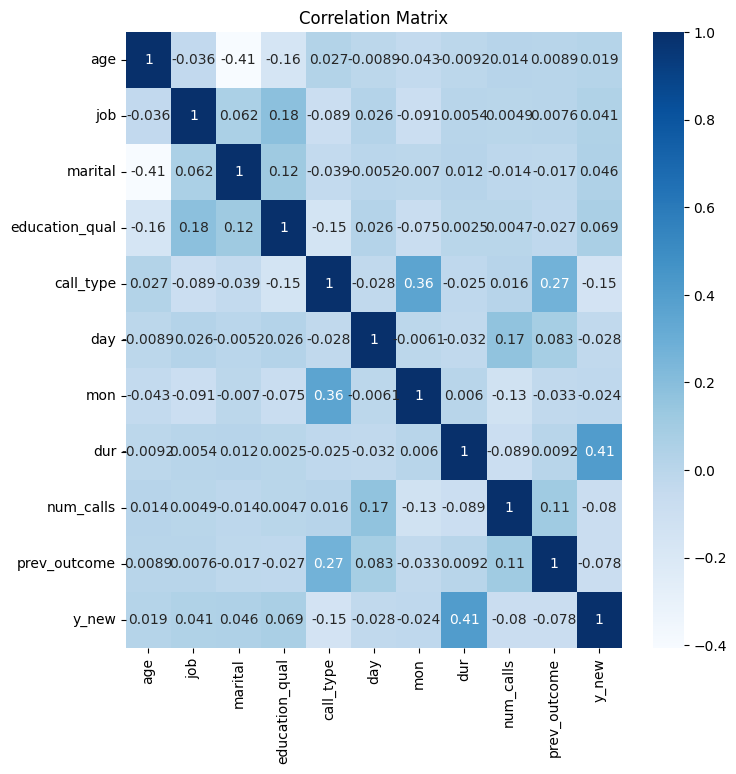

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,8))
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), cmap='Blues', annot = True)
plt.title('Correlation Matrix')

**Sampling**

In [ ]:
data.y_new.value_counts()

0    39916
1     5289
Name: y_new, dtype: int64

Since the dataset is imbalanced, we need to sample the data. Here we do combination of Over sampling and Under sampling - SMOTEENN (Training data should only be sampled. test data should remain the same)

In [ ]:
X = data.drop(['y_new'], axis = 1)
Y = data['y_new']

In [ ]:
# X_OHE = data_OHE.drop(['y_new'],axis = 1)
# Y_OHE = data_OHE['y_new']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 7)
#X_train_OHE, X_test_OHE, Y_train_OHE,Y_test_OHE = train_test_split(X_OHE,Y_OHE, test_size = 0.20, random_state = 7)

In [ ]:
X_train.describe()

age           job       marital  education_qual     call_type  \
count  36164.000000  36164.000000  36164.000000    36164.000000  36164.000000   
mean      22.845786      4.276103      1.167874        1.140997      0.640858   
std       10.387936      3.242352      0.606991        0.651767      0.898238   
min        0.000000      0.000000      0.000000        0.000000      0.000000   
25%       15.000000      1.000000      1.000000        1.000000      0.000000   
50%       21.000000      4.000000      1.000000        1.000000      0.000000   
75%       30.000000      7.000000      2.000000        2.000000      2.000000   
max       53.000000     10.000000      2.000000        2.000000      2.000000   

                day           mon           dur     num_calls  prev_outcome  
count  36164.000000  36164.000000  36164.000000  36164.000000  36164.000000  
mean      14.770628      5.524555    254.969611      1.656122      2.559147  
std        8.299802      3.010546    236.815663      2.440983      0.989848  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        7.000000      3.000000    103.000000      0.000000      3.000000  
50%       15.000000      6.000000    180.000000      1.000000      3.000000  
75%       20.000000      8.000000    319.000000      2.000000      3.000000  
max       30.000000     11.000000   1377.000000     13.000000      3.000000

In [ ]:
X_train.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
dtype: object

In [ ]:
Y_train.unique()

array([0, 1])

**Sampling**  [To balance the imbalanced data]

In [ ]:
import imblearn
from imblearn.combine import SMOTEENN    # SMOTE + Edited NearestNeighbors
combo = SMOTEENN(sampling_strategy = 'all',random_state = 42)
X_combo,Y_combo = combo.fit_resample(X_train,Y_train)
#X_combo_OHE,Y_combo_OHE = combo.fit_resample(X_train_OHE,Y_train_OHE)

In [ ]:
X_combo.shape , Y_combo.shape

((52900, 10), (52900,))

In [ ]:
Y_combo.value_counts()

1    30277
0    22623
Name: y_new, dtype: int64

In [ ]:
X_combo.head()

age  job  marital  education_qual  call_type  day  mon  dur  num_calls  \
0   22    0        1               1          2   15    8   75          0   
1   29    4        1               2          2   19    6   92          2   
2   17    7        1               1          0   30    5    5          2   
3   19    7        2               1          0   14    8  102          0   
4    8    0        2               1          2   18    8  128          2   

   prev_outcome  
0             3  
1             3  
2             3  
3             0  
4             3

In [ ]:
# #Cluster Centroid Under Sampling:
# from imblearn.under_sampling import ClusterCentroids
# ClustercentroidUS = ClusterCentroids(sampling_strategy = {0 : 20})
# X_sample, Y_sample = ClustercentroidUS.fit_resample(X_train, Y_train)

# #SMOTE Over sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'all')
X_smote , Y_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
X_smote.shape, Y_smote.shape

((63812, 10), (63812,))

In [ ]:
Y_smote.value_counts()

0    31906
1    31906
Name: y_new, dtype: int64

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train_scaled, Y_smote)  

LogisticRegression()

In [ ]:
LR_predict = LR_model.predict(X_test_scaled)
LR_predict_proba = LR_model.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
print('Logistic Regression AUROC : ',roc_auc_score(Y_test, LR_predict_proba[:,1]))

Logistic Regression AUROC :  0.82480689148264


In [ ]:
accuracy_score(Y_test,LR_predict)

0.771817276849906

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, LR_predict)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[6288, 1722],
       [ 341,  690]])

**Model Building with KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()   
knnclassifier.fit(X_train_scaled , Y_smote) 
#knnclassifier.score(X_test_scaled , Y_test_OHE)

KNN_proba = knnclassifier.predict_proba(X_test_scaled)
KNN_auroc = roc_auc_score(Y_test , KNN_proba[:,1])
print(f'KNN Test AUROC : {(KNN_auroc*100):.2f}%')

KNN Test AUROC : 84.41%


In [ ]:
KNN_predict = knnclassifier.predict(X_test_scaled)
accuracy_score(Y_test,KNN_predict)

0.851343877889614

In [ ]:
knnclassifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
grid_params = { 'n_neighbors' : [4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
               }
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_smote, Y_smote)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

In [ ]:
g_res.best_score_

0.981040488835589

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors = 4, metric = 'manhattan',weights = 'distance')   
knn_tuned.fit(X_train_scaled , Y_smote)

Y_predict_proba_knn = knn_tuned.predict_proba(X_test_scaled)
Y_predict_val_knn = knn_tuned.predict(X_test_scaled)

Y_predict_knn = Y_predict_proba_knn[:,1]
KNN_auroc = roc_auc_score(Y_test , Y_predict_knn)
print(f'KNN Classifier AUROC : {(KNN_auroc*100):.2f}%')

KNN Classifier AUROC : 84.05%


In [ ]:
accuracy_score(Y_test,Y_predict_val_knn)

0.8640637097666187

In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_val_knn)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7183,  827],
       [ 402,  629]])

**Model Bulding - Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model_scaled = DecisionTreeClassifier() 
DT_model_scaled.fit(X_smote,Y_smote)

DT_predict_proba = DT_model_scaled.predict_proba(X_test)
DT_predict = DT_predict_proba[:,1]

DT_auroc_scaled = roc_auc_score(Y_test , DT_predict)
print(f'Decision Tree AUROC : {(DT_auroc_scaled*100):.2f}%')

# CV_score = np.mean(cross_val_score(DT_model , X_combo,Y_combo, cv=10))
# print(f'Decision Tree CV-score : {(CV_score*100):.2f}%')

Decision Tree AUROC : 72.98%


Trying Hyper Parameter Tuning

In [ ]:
param_dict = {"criterion" : ['gini','entropy'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10,12,15,20]}

grid = GridSearchCV(DT_model_scaled, param_grid = param_dict, cv = 10, n_jobs = -1)

In [ ]:
grid.fit(X_train_scaled,Y_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15,
                                       20]})

In [ ]:
grid.best_score_

0.9040915503997493

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 20}

Constructing the model with the best values of hyper parameters

In [ ]:
DT_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4) 
DT_model.fit(X_smote,Y_smote)

Y_predict_proba = DT_model.predict_proba(X_test)
Y_predict_val_ws = DT_model.predict(X_test)

Y_predict_DT = Y_predict_proba[:,1]
DT_auroc = roc_auc_score(Y_test , Y_predict_DT)
print(f'Decision Tree AUROC : {(DT_auroc*100):.2f}%')

Decision Tree AUROC : 85.18%


In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_val_ws)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7152,  858],
       [ 401,  630]])

In [ ]:
accuracy_score(Y_test, Y_predict_val_ws)

0.855025986951233

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


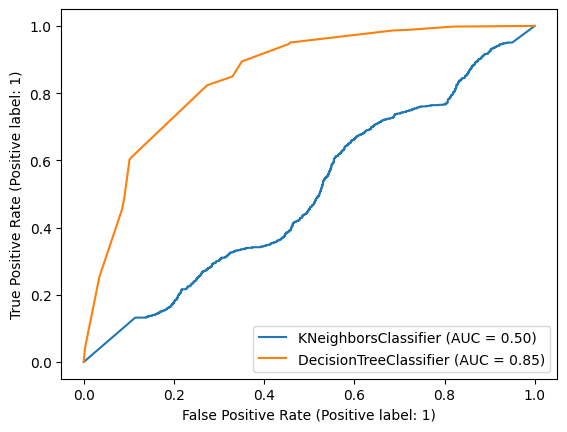

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn_tuned, X_test, Y_test)
dt_disp = RocCurveDisplay.from_estimator(DT_model, X_test, Y_test, ax=knn_disp.ax_)

In [ ]:
# plt.figure()
# plt.plot(accuracy_df['Max Depth'], accuracy_df['Training Accuracy'])
# plt.plot(accuracy_df['Max Depth'], accuracy_df['Validation Accuracy'])
# plt.title('Training Vs Validation Accuracy')
# plt.xticks(range(0,21,2))
# plt.xlabel('max_depth')
# plt.ylabel('Accuracy')
# plt.legend(['Training Accuracy', 'Validation Accuracy'])

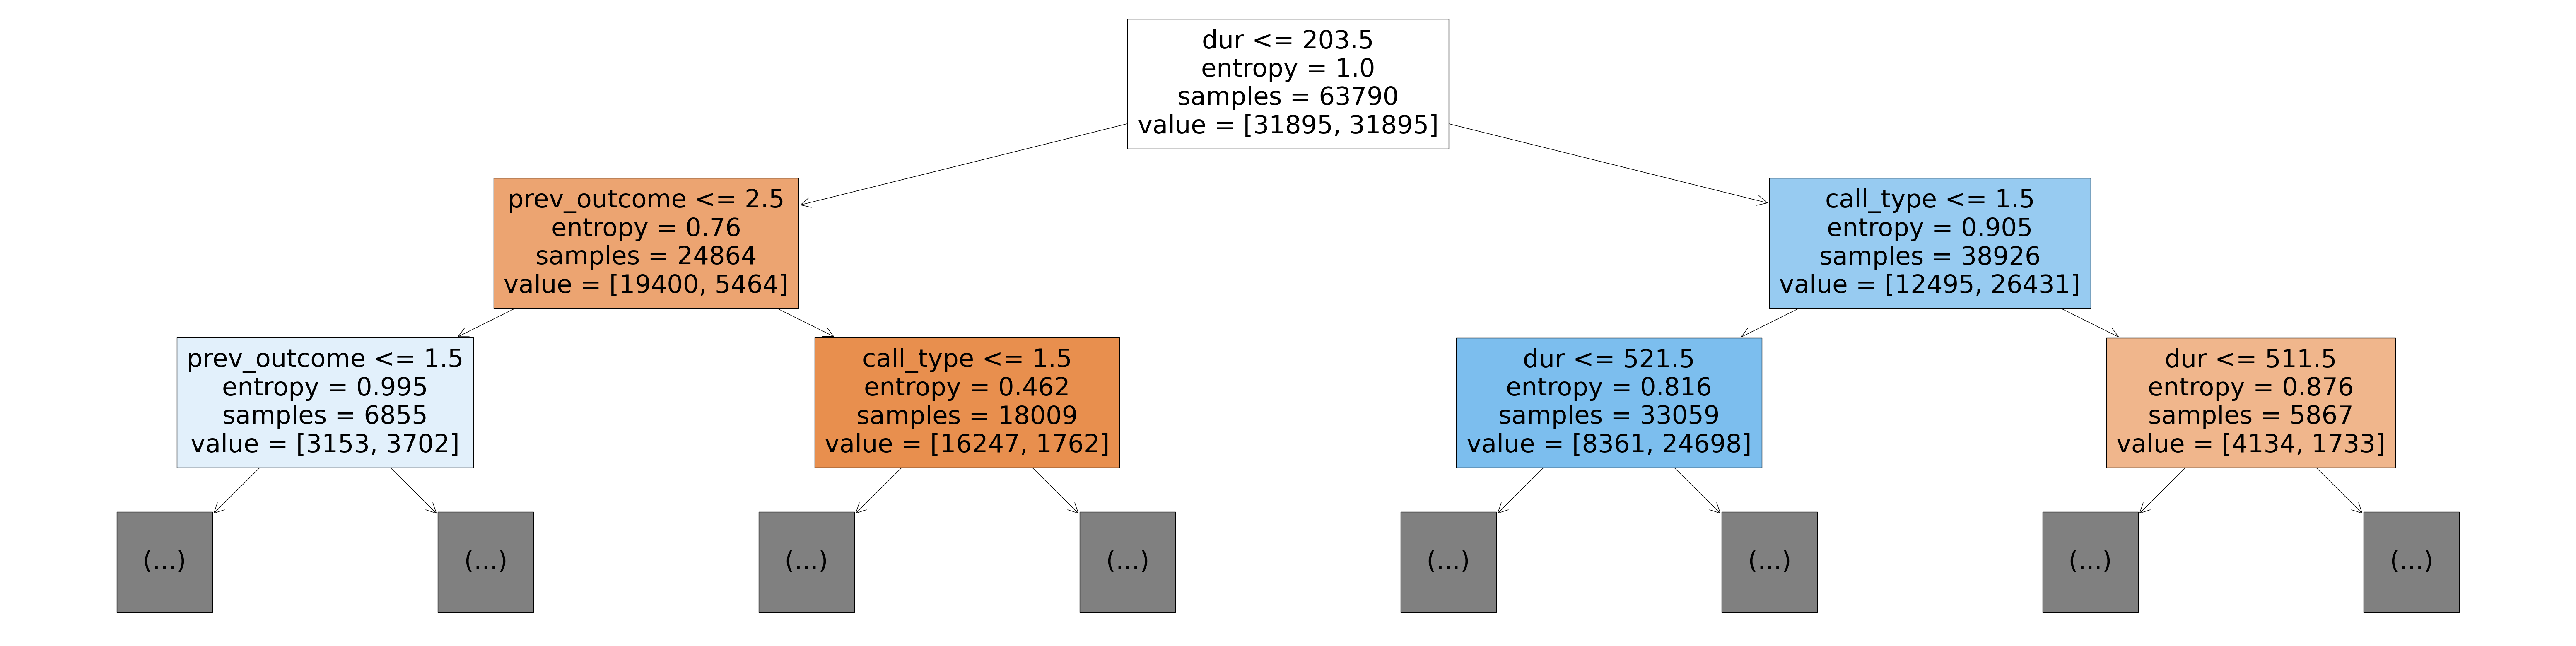

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(DT_model, feature_names=X_smote.columns, max_depth=2, filled=True);

**Feature Importance**

In [ ]:
X_columns = X_test.columns
feature_importance = DT_model.feature_importances_
feat_imp_format = list(zip(feature_importance , X_columns))
feat_imp_sorted = sorted(feat_imp_format,key = lambda x : x[0], reverse = True)
feat_imp_sorted

[(0.5070157419473698, 'dur'),
 (0.2820986181673875, 'prev_outcome'),
 (0.17714871395337928, 'call_type'),
 (0.02330536617505204, 'num_calls'),
 (0.005693923095201724, 'education_qual'),
 (0.004737636661609737, 'mon'),
 (0.0, 'age'),
 (0.0, 'job'),
 (0.0, 'marital'),
 (0.0, 'day')]

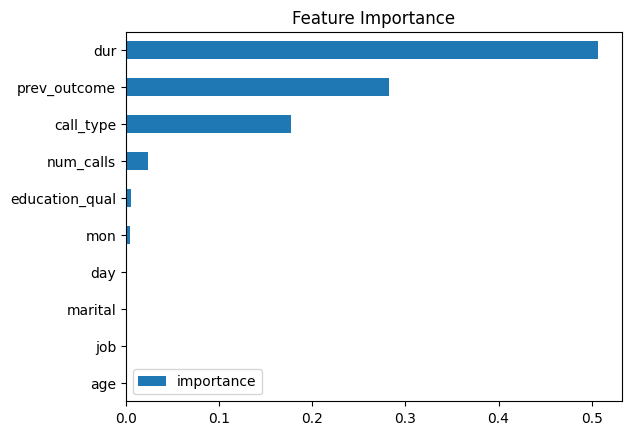

In [ ]:
import matplotlib.pyplot as plt
plot_data = pd.DataFrame(feature_importance , index = X_test.columns , columns=['importance'])
plot_data.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

**Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=7)
model2 = DecisionTreeClassifier(random_state=7)
model3 = KNeighborsClassifier(5)

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') 

model.fit(X_train_scaled,Y_smote) 

Y_predict_voting = model.predict(X_test_scaled)

roc_auc_score(Y_test,model.predict_proba(X_test_scaled)[:,1])

0.8843711364673886

In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_voting )
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7155,  855],
       [ 372,  659]])

In [ ]:
accuracy_score(Y_test,Y_predict_voting )

0.8642849242340449

**BootStrap Aggregation** -  Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(DecisionTreeClassifier(max_depth = 12, random_state=7), n_estimators=100)
bagging_model.fit(X_smote, Y_smote)
Y_predict_bag = bagging_model.predict_proba(X_test)
Y_predict_bag_val = Y_predict_bag[:,1]
roc_auc_score(Y_test,Y_predict_bag_val)

0.9093614189828186

In [ ]:
Y_predict_bag_con = bagging_model.predict(X_test)
confusion_mat = confusion_matrix(Y_test, Y_predict_bag_con)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7151,  859],
       [ 285,  746]])

In [ ]:
accuracy_score(Y_test, Y_predict_bag_con)

0.8734653246322309

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


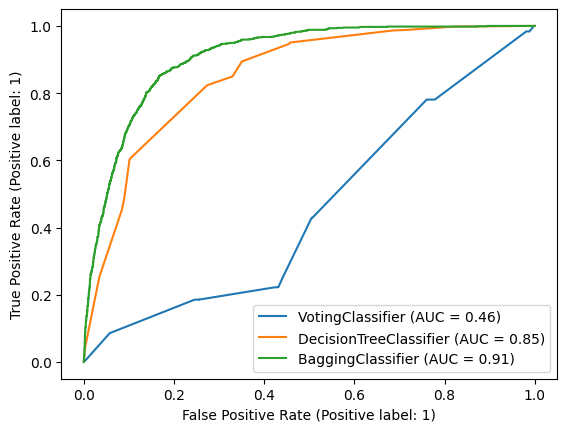

In [ ]:
#from sklearn.metrics import RocCurveDisplay
voting_disp = RocCurveDisplay.from_estimator(model, X_test, Y_test)
dt_model = RocCurveDisplay.from_estimator(DT_model,X_test,Y_test,ax = voting_disp.ax_)
bag_disp = RocCurveDisplay.from_estimator(bagging_model, X_test, Y_test, ax=voting_disp.ax_)

**Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from pprint import pprint

RFA_model = RandomForestClassifier() #max_features='sqrt',n_estimators= 100, max_depth = 6
RFA_model.fit(X_smote,Y_smote)

Y_RFA_proba = RFA_model.predict_proba(X_test)
roc_auc_score(Y_test,Y_RFA_proba[:,1])

0.9180805758078832

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {
    'max_depth': [3, 4, 20, 30],  #log2(#features)
    'n_estimators': [150, 300]
}
RFA_GCV_model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFA_GCV_model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_smote,Y_smote)
grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'bootstrap': True, 'max_depth': 30, 'n_estimators': 150}

In [ ]:
RFA_model_tuned = RandomForestClassifier(bootstrap = True,max_features='sqrt',random_state = 42,n_estimators= 150)
RFA_model_tuned.fit(X_smote,Y_smote)

Y_predict_RFA_proba = RFA_model_tuned.predict_proba(X_test)
Y_predict_RFA = Y_predict_RFA_proba[:,1]

Y_predict_RFA_val = RFA_model_tuned.predict(X_test)

RFA_auroc = roc_auc_score(Y_test , Y_predict_RFA)
print(f'RandomForest AUROC : {(RFA_auroc*100):.2f}%')

RandomForest AUROC : 91.73%


In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_RFA_val)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7353,  657],
       [ 352,  679]])

In [ ]:
accuracy_score(Y_test,Y_predict_RFA_val)

0.8883973011834974

In [ ]:
# Pull out one tree from the forest
tree = RFA_model_tuned.estimators_[90]
tree

DecisionTreeClassifier(max_features='sqrt', random_state=698027879)

In [ ]:
#print('The depth of this tree is:', tree.tree_.max_depth)

In [ ]:
feature_importance_RFA = RFA_model_tuned.feature_importances_
feature_imp_RFA_formated = list(zip(feature_importance_RFA,X_test.columns))
feature_imp_RFA_sorted = sorted(feature_imp_RFA_formated, key = lambda x: x [0] , reverse = True)
feature_imp_RFA_sorted

[(0.3709204691760844, 'dur'),
 (0.1460577261945053, 'prev_outcome'),
 (0.09007082089273805, 'age'),
 (0.08907348662444992, 'day'),
 (0.08731586564995338, 'mon'),
 (0.08095329658615867, 'call_type'),
 (0.05054691480490198, 'job'),
 (0.04483806763643332, 'num_calls'),
 (0.020240023558694236, 'education_qual'),
 (0.019983328876080824, 'marital')]

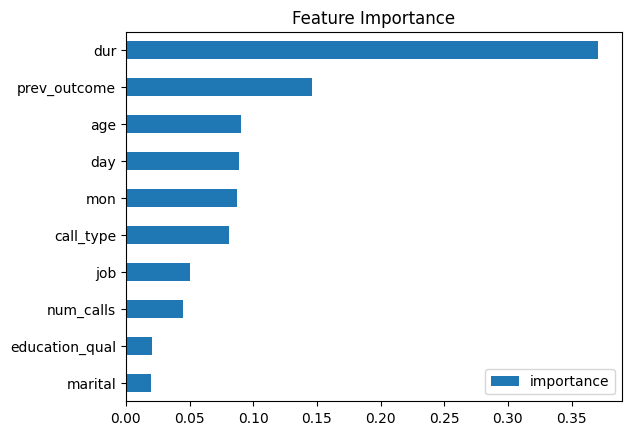

In [ ]:
plot_data = pd.DataFrame(feature_importance_RFA , index = X_test.columns , columns=['importance'])
plot_data.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

**Using XGBoost ML Algorithm**

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_smote,Y_smote) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_smote,Y_smote), " Cross-Val score : ", np.mean(cross_val_score(model,X_smote, Y_smote, cv=10)))

Learning rate :  0.01  Train score :  0.8567510813013226  Cross-Val score :  0.8537277847786424
Learning rate :  0.02  Train score :  0.867564094527675  Cross-Val score :  0.8628640897690089
Learning rate :  0.03  Train score :  0.8804926972983138  Cross-Val score :  0.874586174257632
Learning rate :  0.04  Train score :  0.8929511690591111  Cross-Val score :  0.8854932584203997
Learning rate :  0.05  Train score :  0.9011314486303517  Cross-Val score :  0.8924042756398745
Learning rate :  0.06  Train score :  0.9060364821663637  Cross-Val score :  0.8974974622786988
Learning rate :  0.07  Train score :  0.9108631605340688  Cross-Val score :  0.9016189063318706
Learning rate :  0.08  Train score :  0.9140287093336676  Cross-Val score :  0.9037189324052411
Learning rate :  0.09  Train score :  0.9180091518836583  Cross-Val score :  0.9056778214429384
Learning rate :  0.1  Train score :  0.9213940951545164  Cross-Val score :  0.9073233511957284
Learning rate :  0.11  Train score :  0.922

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
model = xgb.XGBClassifier(learning_rate = 0.1) 
model.fit(X_smote,Y_smote)
print(" Train score : ", model.score(X_smote,Y_smote), " Cross-Val score : ", np.mean(cross_val_score(model,X_smote, Y_smote, cv=10)))

 Train score :  0.9198896759230238  Cross-Val score :  0.9076367645034413


In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.1)  #n_estimators = 300,gamma = ,learning_rate = 0.1

xgb_model.fit(X_smote, Y_smote)

Y_predict_XGB_proba = xgb_model.predict_proba(X_test)
Y_predict_XGB = Y_predict_XGB_proba[:,1]

Y_predict_XGB = xgb_model.predict(X_test)

XGB_auroc = roc_auc_score(Y_test , Y_predict_XGB)
print(f'XGB AUROC : {(XGB_auroc*100):.2f}%')

XGB AUROC : 82.70%


In [ ]:
Y_predict_XGB_val = model.predict(X_test)
accuracy_score(Y_test, Y_predict_XGB_val)

0.8806547948235814

In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_XGB_val)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7182,  828],
       [ 251,  780]])

In [ ]:
from sklearn.model_selection import cross_validate
cv_results_model = cross_validate(xgb_model, X_smote, Y_smote, cv= 10,scoring=('roc_auc'),return_estimator = True)
cv_results_model

{'fit_time': array([36.62991905, 22.83523583,  4.2436533 ,  6.1565752 ,  4.23823094,
         6.12088299,  4.19267464,  4.21253014,  6.19495702,  4.22845936]),
 'score_time': array([0.10863209, 0.02009749, 0.02010226, 0.0205276 , 0.02073097,
        0.02281761, 0.02039909, 0.02014232, 0.02101231, 0.01986122]),
 'estimator': [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.09, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators

In [ ]:
model_validated = cv_results_model['estimator'][8]
model_validated 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
XGB_Model_final = model_validated.fit(X_smote,Y_smote)
Y_predict_XGB_proba = XGB_Model_final.predict_proba(X_test)
Y_predict_XGB = Y_predict_XGB_proba[:,1]

Y_predict_val = XGB_Model_final.predict(X_test)

XGB_auroc = roc_auc_score(Y_test , Y_predict_XGB)
print(f'Validated XGB AUROC : {(XGB_auroc*100):.2f}%')

Validated XGB AUROC : 92.23%


In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_val)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7162,  848],
       [ 259,  772]])

In [ ]:
accuracy_score(Y_test, Y_predict_val)

0.8775577922796151

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
eval_set = [(X_test,Y_test)]                               
XGB_model_tuned = model_validated.fit(X_smote,Y_smote,early_stopping_rounds = 10, eval_metric = 'error',eval_set=eval_set, verbose=2)
# Y_predict_XGB = XGB_model_tuned.predict(X_test)
cv_results = cross_validate(XGB_model_tuned , X_smote, Y_smote, cv= 10,scoring=('roc_auc'),return_estimator = True)
cv_results

[0]	validation_0-error:0.19102


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-error:0.15651
[4]	validation_0-error:0.16790
[6]	validation_0-error:0.16093
[8]	validation_0-error:0.15927
[10]	validation_0-error:0.16060
[12]	validation_0-error:0.16149


{'fit_time': array([ 4.31092262,  6.23213911,  5.07148957,  4.60813689,  6.84544778,
        13.42343831,  9.03220439,  4.25635648,  4.5157032 ,  5.88250303]),
 'score_time': array([0.0206058 , 0.02075624, 0.02127051, 0.04760814, 0.02106857,
        0.04652691, 0.02083182, 0.02311826, 0.04190373, 0.02213907]),
 'estimator': [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.09, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators

In [ ]:
XGB_model_validated = cv_results['estimator'][8]
XGB_model_validated

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
XGB_model_validated.fit(X_smote,Y_smote)
Y_predict_XGB_proba = XGB_model_validated.predict_proba(X_test)
Y_predict_XGB = Y_predict_XGB_proba[:,1]

Y_predict_val_XGB = XGB_model_validated.predict(X_test)

XGB_auroc = roc_auc_score(Y_test , Y_predict_XGB)
print(f'Validated XGB AUROC : {(XGB_auroc*100):.2f}%')

Validated XGB AUROC : 92.23%


In [ ]:
confusion_mat_XGB = confusion_matrix(Y_test, Y_predict_val_XGB)
confusion_mat_XGB  #[[TN,FP],[FN,TP]]

array([[7162,  848],
       [ 259,  772]])

In [ ]:
accuracy_score(Y_test, Y_predict_val_XGB)

0.8775848722768993

**Predicting the model with our values**

In [ ]:
input_col = ['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']
input_data = [32,8,2,2,0,20,8,500,3,2]
input = pd.DataFrame(np.column_stack(input_data),columns = input_col)
Y_predict_val = XGB_Model_final.predict(input)
Y_predict_val

array([1])

In [ ]:
# params = { 'max_depth':[4,8,12,15,30] }
# XGB_gridsearch = GridSearchCV(XGB_model_validated, params, n_jobs=-1, cv=3, scoring='roc_auc', verbose=2, refit=True)
# XGB_gridsearch.fit(X_train_scaled,Y_combo)
# XGB_gridsearch.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'max_depth': 30}

**Feature Importance**

In [ ]:
feature_importance_XGB = XGB_model_validated.feature_importances_
feature_importance_XGB_formated = list(zip(feature_importance_XGB,X_test.columns))
feature_importance_XGB_sorted = sorted(feature_importance_XGB_formated, key = lambda x : x[0], reverse = True)
feature_importance_XGB_sorted

[(0.32406044, 'prev_outcome'),
 (0.23755626, 'call_type'),
 (0.16015765, 'dur'),
 (0.063127555, 'num_calls'),
 (0.047484465, 'mon'),
 (0.041070085, 'job'),
 (0.03503146, 'marital'),
 (0.03388887, 'day'),
 (0.031039394, 'education_qual'),
 (0.026583813, 'age')]

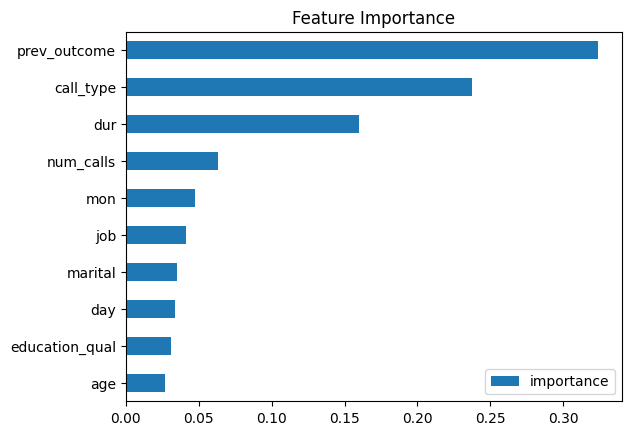

In [ ]:
plot_data = pd.DataFrame(feature_importance_XGB , index = X_test.columns , columns=['importance'])
plot_data.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

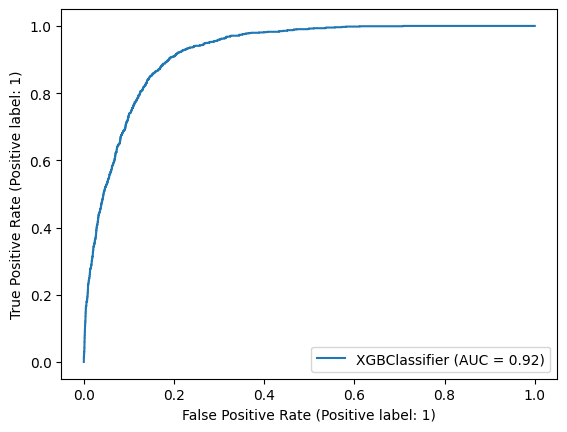

In [ ]:
xgb_disp = RocCurveDisplay.from_estimator(XGB_model_validated, X_test, Y_test)

Building model with 4 important features

In [ ]:
X_imp = X_smote[['call_type','prev_outcome','dur','mon']]  
Y_imp = Y_smote
X_test_imp = X_test[['call_type','prev_outcome','dur','mon']]
X_imp.head()

call_type  prev_outcome  dur  mon
0          2             3   75    8
1          2             3   92    6
2          0             3    5    5
3          0             0  235    3
4          0             0  102    8

In [ ]:
XGB_model_validated.fit(X_imp,Y_imp)
Y_predict_XGB_imp_proba = XGB_model_validated.predict_proba(X_test_imp)
Y_predict_XGB_imp = Y_predict_XGB_imp_proba[:,1]
XGB_auroc_imp = roc_auc_score(Y_test , Y_predict_XGB_imp)
print(f'XGB AUROC with Imp features : {(XGB_auroc_imp*100):.2f}%')

XGB AUROC with Imp features : 90.87%


**PCA - Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA
for count in [2,4,6,8,9]:
  pca = PCA(n_components = count)
  pca.fit(X_train_scaled , X_test_scaled)
  print(sum(pca.explained_variance_ratio_))

0.3105341783628732
0.5451362071983301
0.7344646454098152
0.8930999693523982
0.9473268212039914


In [ ]:
# pca = PCA(n_components=2)
# PCA_columns = pca.fit_transform(X_smote)
# PCA_data = pd.DataFrame(data = PCA_columns, columns = ['Column 1', 'Column 2'])
# PCA_combined = pd.concat([PCA_data, data[['y_new']]], axis = 1)

**Pickling**

In [ ]:
import pickle

In [ ]:
pickle_out = open('trained_model.pkl', 'wb')
pickle.dump(XGB_Model_final,pickle_out)
pickle_out.close()

In [ ]:
loaded_model = pickle.load(open('trained_model.pkl','rb'))

In [ ]:
loaded_model.predict(input)

array([1])

**Light Weight Gradient Boosting**

In [ ]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier()
LGBM_model.fit(X_smote,Y_smote)

Y_predict_LGBM = LGBM_model.predict_proba(X_test)
Y_predict_LGBM_val = LGBM_model.predict(X_test)

roc_auc_score(Y_test,Y_predict_LGBM[:,1])

0.925029394634011

In [ ]:
accuracy_score(Y_test,Y_predict_LGBM_val)

0.8796593297201637

In [ ]:
confusion_mat_LGBM = confusion_matrix(Y_test, Y_predict_LGBM_val)
confusion_mat_LGBM  #[[TN,FP],[FN,TP]]

array([[7164,  846],
       [ 242,  789]])

In [ ]:
parameters = {
    "learning_rate" :[0.001,0.1,0.2,0.3,0.5,0.7,1],
    "max_depth" : [3,5,7],
    "subsample" :[0.6,0.8,1]
}

grid = GridSearchCV(LGBM_model,param_grid = parameters,cv = 10, n_jobs = -1)
grid.fit(X_combo,Y_combo)
print(grid.best_params_)

{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.6}


In [ ]:
LGBM_model_tuned = LGBMClassifier(learning_rate = 0.1,max_bin = 20,num_leaves = 40,min_gain_to_split =1)
LGBM_model_tuned.fit(X_smote,Y_smote)

[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1


LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40)

In [ ]:
Y_predict_LGBM = LGBM_model_tuned.predict_proba(X_test)
Y_predict_LGBM_val = LGBM_model_tuned.predict(X_test)

roc_auc_score(Y_test,Y_predict_LGBM[:,1])

0.9260932926954789

In [ ]:
params = {
    'num_leaves': [20, 30,40, ],
     }

LGBM_gridsearch = GridSearchCV(LGBM_model_tuned, params, n_jobs=-1, cv=3, scoring='roc_auc', verbose=2, refit=True)
LGBM_gridsearch.fit(X_combo,Y_combo)
LGBM_gridsearch.best_params_


Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'num_leaves': 40}

In [ ]:
cv_results_model = cross_validate(LGBM_model_tuned, X_smote, Y_smote, cv= 10,scoring=('roc_auc'),return_estimator = True)
cv_results_model

[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split i

{'fit_time': array([0.65464401, 0.64090872, 0.65330195, 0.64323902, 0.62388635,
        0.65306687, 0.67832375, 0.81934214, 2.63220239, 0.63059092]),
 'score_time': array([0.05914879, 0.04054594, 0.04000974, 0.05492496, 0.03970003,
        0.04254556, 0.03967118, 0.07893991, 0.0396626 , 0.03927636]),
 'estimator': [LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40)],
 'test_score': array([0.

In [ ]:
LGBM_model_validated = cv_results_model['estimator'][8]
LGBM_model_validated

LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40)

In [ ]:
LGBM_model_validated.fit(X_smote,Y_smote)

Y_predict_LGBM = LGBM_model_validated.predict_proba(X_test)
Y_predict_LGBM_val = LGBM_model_validated.predict(X_test)

roc_auc_score(Y_test,Y_predict_LGBM[:,1])

[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1


0.9260932926954789

In [ ]:
accuracy_score(Y_test,Y_predict_LGBM_val)

0.8805441875898684

In [ ]:
confusion_mat = confusion_matrix(Y_test,Y_predict_LGBM_val)
confusion_mat

array([[7166,  844],
       [ 236,  795]])

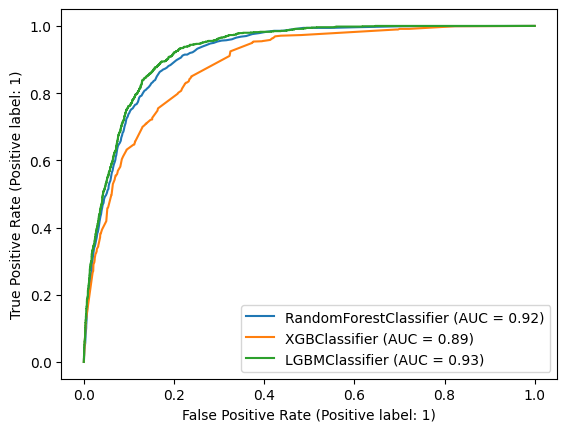

In [ ]:
#from sklearn.metrics import RocCurveDisplay
rfa_disp = RocCurveDisplay.from_estimator(RFA_model_tuned, X_test, Y_test)
xgboost_disp = RocCurveDisplay.from_estimator(XGB_Model_final , X_test, Y_test,ax=rfa_disp.ax_)
lgbm_disp = RocCurveDisplay.from_estimator(LGBM_model_validated, X_test, Y_test, ax=rfa_disp.ax_)

**AdaBoost Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
adaboost_model = AdaBoostClassifier(learning_rate=1)
adaboost_model.fit(X_smote,Y_smote)
Y_predict_ada = adaboost_model.predict_proba(X_test)
Y_predict_ada_val = adaboost_model.predict(X_test)

roc_auc_score(Y_test,Y_predict_ada[:,1])

0.8862450670899978

**CatBoost Algorithm**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier() 
cat_model.fit(X_smote,Y_smote)

Learning rate set to 0.060761
0:	learn: 0.6401021	total: 21.6ms	remaining: 21.6s
1:	learn: 0.5987106	total: 39.1ms	remaining: 19.5s
2:	learn: 0.5709998	total: 54.6ms	remaining: 18.1s
3:	learn: 0.5400000	total: 70.6ms	remaining: 17.6s
4:	learn: 0.5135124	total: 86.4ms	remaining: 17.2s
5:	learn: 0.4951348	total: 103ms	remaining: 17s
6:	learn: 0.4760812	total: 133ms	remaining: 18.9s
7:	learn: 0.4621052	total: 149ms	remaining: 18.5s
8:	learn: 0.4497160	total: 165ms	remaining: 18.2s
9:	learn: 0.4378490	total: 182ms	remaining: 18s
10:	learn: 0.4276779	total: 205ms	remaining: 18.4s
11:	learn: 0.4189617	total: 222ms	remaining: 18.3s
12:	learn: 0.4117197	total: 238ms	remaining: 18.1s
13:	learn: 0.4057643	total: 255ms	remaining: 17.9s
14:	learn: 0.3997170	total: 271ms	remaining: 17.8s
15:	learn: 0.3939801	total: 287ms	remaining: 17.6s
16:	learn: 0.3889899	total: 305ms	remaining: 17.7s
17:	learn: 0.3833757	total: 321ms	remaining: 17.5s
18:	learn: 0.3789947	total: 337ms	remaining: 17.4s
19:	learn:

In [ ]:
Y_predict_cat = cat_model.predict_proba(X_test)
Y_predict_cat_val = cat_model.predict(X_test)
roc_auc_score(Y_test,Y_predict_cat[:,1])

0.9252776899874188

In [ ]:
accuracy_score(Y_test,Y_predict_cat_val)

0.8895033735206282

In [ ]:
confusion_mat_cat = confusion_matrix(Y_test,Y_predict_cat_val)
confusion_mat_cat

array([[7293,  717],
       [ 282,  749]])

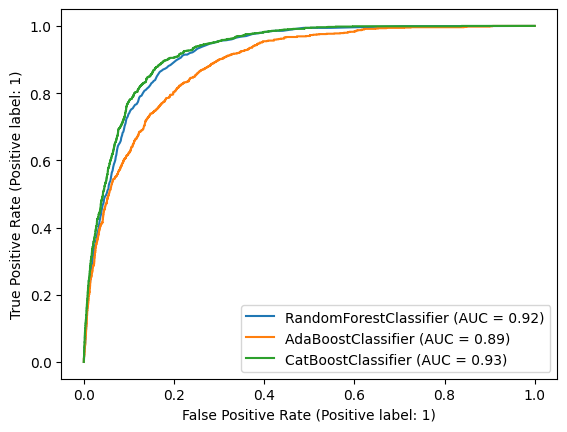

In [ ]:
rfa_disp = RocCurveDisplay.from_estimator(RFA_model_tuned, X_test, Y_test)
#xgboost_disp = RocCurveDisplay.from_estimator(XGB_Model_final , X_test, Y_test,ax=rfa_disp.ax_)
#lgbm_disp = RocCurveDisplay.from_estimator(LGBM_model_validated, X_test, Y_test, ax=rfa_disp.ax_)
ada_disp = RocCurveDisplay.from_estimator(adaboost_model, X_test, Y_test, ax = rfa_disp.ax_)
cat_disp = RocCurveDisplay.from_estimator(cat_model,X_test,Y_test,ax = rfa_disp.ax_)

**Navie Bayes Algorithm**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
gnb =  GaussianNB()
gnb.fit(X_smote,Y_smote)
Y_predict_gnb = gnb.predict_proba(X_test)
roc_auc_score(Y_test,Y_predict_gnb[:,1])

0.7908908723455527

In [ ]:
Y_predict_gnb = gnb.predict(X_test)
accuracy_score(Y_test,Y_predict_gnb)

0.6665191903550493

**Trying to predict the best threshold to improve accuracy**

In [ ]:
pred=[]
for model in [XGB_Model_final,cat_model,LGBM_model_validated,adaboost_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(Y_test,final_prediction)))

Ensemble test roc-auc: 0.9276297450689064


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, final_prediction)
thresholds


array([1.78319929, 0.78319929, 0.78123833, ..., 0.21709418, 0.21708184,
       0.20840888])

In [ ]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(Y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

thresholds  accuracy
326    0.658964  0.907422
327    0.658772  0.907422
232    0.692982  0.907422
230    0.693148  0.907422
227    0.693955  0.907311

In [ ]:
y_pred_threshold = (cat_model.predict_proba(X_test)[:,1] >= 0.658964).astype(bool) 

In [ ]:
accuracy_score(Y_test,y_pred_threshold )

0.9021125981639199

In [ ]:
confusion_mat_threshold = confusion_matrix(Y_test,y_pred_threshold )
confusion_mat_threshold

array([[7537,  473],
       [ 412,  619]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

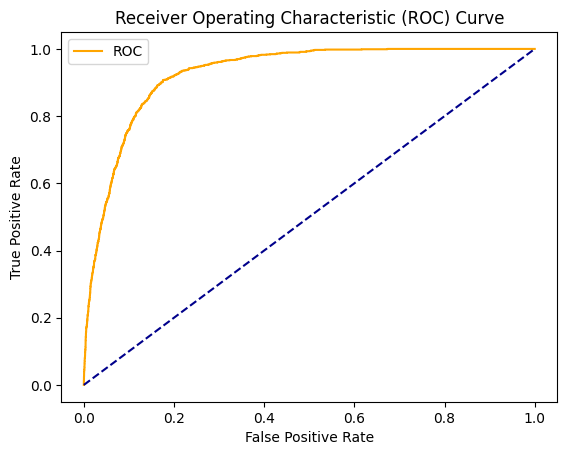

In [ ]:
plot_roc_curve(fpr,tpr)

**Feature Selection ( features that doesnt show big variance)**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
var_thres=VarianceThreshold(threshold=0.4)
var_thres.fit(data)

VarianceThreshold(threshold=0.4)

In [ ]:
var_thres.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False])

In [ ]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [ ]:
for feature in constant_columns:
     print(feature)

marital
y_new


In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = xgb.XGBClassifier(random_state=7,learning = 0.1)
model2 = CatBoostClassifier(random_state=7)
model3 =  LGBMClassifier(random_state = 7)

model = VotingClassifier(estimators=[('xgb', model1), ('cat', model2),('LGBM',model3)], voting='soft') 

model.fit(X_smote,Y_smote) 

Y_predict_voting = model.predict(X_test)

[16:15:55] WARNING: ../src/learner.cc:767: 
Parameters: { "learning" } are not used.

Learning rate set to 0.060761
0:	learn: 0.6396727	total: 55.2ms	remaining: 55.2s
1:	learn: 0.5984767	total: 76.2ms	remaining: 38s
2:	learn: 0.5641885	total: 97.2ms	remaining: 32.3s
3:	learn: 0.5394454	total: 120ms	remaining: 30s
4:	learn: 0.5134848	total: 161ms	remaining: 32s
5:	learn: 0.4953699	total: 205ms	remaining: 33.9s
6:	learn: 0.4759551	total: 259ms	remaining: 36.7s
7:	learn: 0.4605652	total: 307ms	remaining: 38.1s
8:	learn: 0.4489904	total: 354ms	remaining: 39s
9:	learn: 0.4379386	total: 402ms	remaining: 39.8s
10:	learn: 0.4285762	total: 456ms	remaining: 41s
11:	learn: 0.4190386	total: 497ms	remaining: 40.9s
12:	learn: 0.4104602	total: 520ms	remaining: 39.5s
13:	learn: 0.4033532	total: 546ms	remaining: 38.5s
14:	learn: 0.3977466	total: 568ms	remaining: 37.3s
15:	learn: 0.3919440	total: 608ms	remaining: 37.4s
16:	learn: 0.3867131	total: 653ms	remaining: 37.8s
17:	learn: 0.3825218	total: 715ms	

In [ ]:
roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])

0.9258888319765182

In [ ]:
accuracy_score(Y_test,Y_predict_voting)

0.8887291228846367

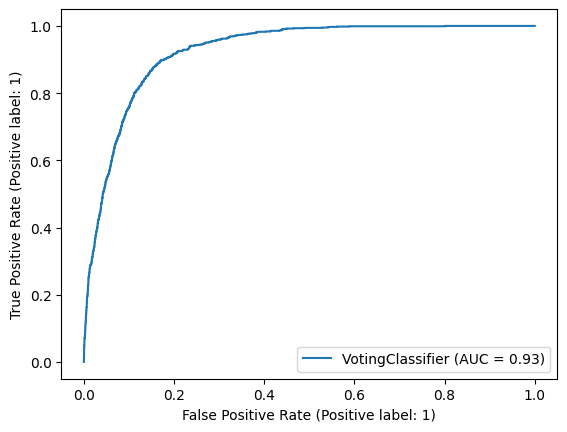

In [ ]:
vote_disp = RocCurveDisplay.from_estimator(model, X_test, Y_test)